<a href="https://colab.research.google.com/github/1stMourinhoFan/DataScience_TermProject/blob/main/drug_death_team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Overdoes Deaths

Dataset: https://www.kaggle.com/datasets/ruchi798/drug-overdose-deaths

This data is about drug overdose deaths in Connecticut

Our goal is to **define** and **predict multi-drug use**.

To reach this goal, we have to understand the columns and general information of the following data.

# *Data Exploration* - understanding columns and dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings

warnings.filterwarnings(action="ignore")

# Load the dataset
file_path = 'drug_deaths.csv'
df = pd.read_csv(file_path)

 **Columns Explanations**
1. **Unnamed: 0**: Index column
2. **ID**: Unique identifier for each record
3. **Date**: Date of death
4. **DateType**: Date reported 1, Date of Death: 0
5. **Age**: Age
6. **Sex**: Gender
7. **Race**: Race
8. **ResidenceCity**: City of residence
9. **ResidenceCounty**: County of residence
10. **ResidenceState**: State of residence
11. **DeathCity**: City where death occurred
12. **DeathCounty**: County where death occurred
13. **Location**: Location of death
14. **LocationifOther**: Description of location if different from standard locations
15. **DescriptionofInjury**: Description of the injury leading to death
16. **InjuryPlace**: Place where the injury occurred
17. **InjuryCity**: City where the injury occurred
18. **InjuryCounty**: County where the injury occurred
19. **InjuryState**: State where the injury occurred
20. **COD**: Cause of death
21. **OtherSignifican**: Other significant conditions contributing to death
22. **Heroin**: Presence of heroin (binary: 0 or 1)
23. **Cocaine**: Presence of cocaine (binary: 0 or 1)
24. **Fentanyl**: Presence of fentanyl (binary: 0 or 1)
25. **Fentanyl_Analogue**: Presence of fentanyl analogues (binary: 0 or 1)
26. **Oxycodone**: Presence of oxycodone (binary: 0 or 1)
27. **Oxymorphone**: Presence of oxymorphone (binary: 0 or 1)
28. **Ethanol**: Presence of ethanol (binary: 0 or 1)
29. **Hydrocodone**: Presence of hydrocodone (binary: 0 or 1)
30. **Benzodiazepine**: Presence of benzodiazepines (binary: 0 or 1)
31. **Methadone**: Presence of methadone (binary: 0 or 1)
32. **Amphet**: Presence of amphetamines (binary: 0 or 1)
33. **Tramad**: Presence of tramadol (binary: 0 or 1)
34. **Morphine_NotHeroin**: Presence of morphine not derived from heroin (binary: 0 or 1)
35. **Hydromorphone**: Presence of hydromorphone (binary: 0 or 1)
36. **Other**: Presence of other substances
37. **OpiateNOS**: Presence of unspecified opiates (binary: 0 or 1)
38. **AnyOpioid**: Presence of any opioid (binary: 0 or 1)
39. **MannerofDeath**: Manner of death (e.g., Accident, Suicide, etc.)
40. **DeathCityGeo**: Geolocation of the death city
41. **ResidenceCityGeo**: Geolocation of the residence city
42. **InjuryCityGeo**: Geolocation of the injury city

In [ ]:
# Dataset consists of 42 columns and 5105 rows
print("*****Datasets*****")
print(df.sample(5))

print("*****Columns*****")
print(df.columns.values,len(df.columns.values))

print("*****Null Count*****")
print(df.isna().sum())

print("*****Dataset info*****")
print(df.info())

*****Datasets*****
      Unnamed: 0       ID                    Date  DateType   Age   Sex  \
1358        1358  15-0511  09/30/2015 12:00:00 AM       1.0  24.0  Male   
4270        4270  12-0129  05/20/2012 12:00:00 AM       0.0  31.0  Male   
3270        3270  17-0623  07/24/2017 12:00:00 AM       1.0  60.0  Male   
3256        3256  15-0241  05/21/2015 12:00:00 AM       1.0  28.0  Male   
2765        2765  15-0328  07/05/2015 12:00:00 AM       1.0  54.0  Male   

                 Race ResidenceCity ResidenceCounty ResidenceState  ...  \
1358            White        DURHAM       MIDDLESEX             CT  ...   
4270            Black    BRIDGEPORT       FAIRFIELD            NaN  ...   
3270  Hispanic, White     NEW HAVEN       NEW HAVEN             CT  ...   
3256            White  NORTH CANAAN      LITCHFIELD             CT  ...   
2765            White      GRISWOLD      NEW LONDON             CT  ...   

     Tramad Morphine_NotHeroin Hydromorphone Other OpiateNOS AnyOpioid  \
1358 

#*Data Preprocessing 1* - data restructuring, handling null / wrong data

In this Section data restructuring, handling null / wrong data is started

**data restructuring**: Drop columns that are not used for our analysis

**Handling null / wrong data** : Handle null values and worng,unusable data

**Explanation of Columns that is not Chosen**
1. **Unnamed: 0**: Index column, not useful for analysis
2. **ID**: Unique identifier for each record, unique data is not useful
3. **DateType**: Date reported 1, Date of Death: 0 not important data for objectives
4. **ResidenceCounty, ResidenceState, DeathCounty, Location, LocationifOther**: It has too much missing datas, hard to controll
5. **DescriptionofInjury,InjuryPlace, InjuryCity, InjuryCounty, InjuryState**: Not a proper data for needs
6. **COD, OtherSignifican**: Too much unusable data (Text based, abbreviations )
7. **Other**: Not a major part of drug data (In this case, we concern only well-known drugs)
8. **OpiateNOS, AnyOpioid**: can be replaced by existing drug data we're going to use (opioid drugs like heroin, morphine, ... )
9. **MannerofDeath**: 99% is accident and not useful for our objectives
10. **DeathCityGeo,ResidenceCityGeo, InjuryCityGeo**: Only consider city information, not useful.

In [ ]:
# Part 1. Data Restructuring

# Dropping columns not listed in the provided features list
features_to_keep = [
    'Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'DeathCity',
    'Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone',
    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
    'Amphet', 'Tramad', 'Morphine_NotHeroin'
]

# check the text below to know why other columns are dropped
df = df[features_to_keep]

In [ ]:
# Part 2. Data value Changes

# *** 2-1. Handling Missing data ***
# In the case of Date, Age, Deathcity, there is too often no other informations, drop
df.dropna(subset=['Date', 'Age', 'DeathCity'], inplace=True)

# After replacing null value in 'Sex' column with 'Unknown' value, then replace 'Unknown' value using mode()
df.loc[:,'Sex'].fillna('Unknown', inplace=True)
sex_mode = df['Sex'][df['Sex'] != 'Unknown'].mode()[0]
df['Sex'] = df['Sex'].replace('Unknown', sex_mode)

# replacing null value in 'Race' column with 'Unknown' value
df.loc[:,'Race'].fillna('Unknown', inplace=True)

# The place of residence may not be known, so in the case of null, it is judged as "Unknown."
df.loc[:,'ResidenceCity'].fillna('Unknown', inplace=True)

In [ ]:
# *** 2-2. Handling Wrong data ***

# Race is divided into 'Black', 'White', 'Asian', 'Other', then replace 'Unknown' value with mode()
race_replacements = {
    'Hispanic, White': 'White',
    'Hispanic, Black': 'Black',
    'Asian, Other': 'Asian',
    'Asian Indian': 'Asian',
    'Chinese': 'Asian',
    'Native American, Other': 'Other',
    'Hawaiian': 'Other'
}
df['Race'] = df['Race'].replace(race_replacements)
race_mode = df['Race'][df['Race'] != 'Unknown'].mode()[0]
df['Race'] = df['Race'].replace('Unknown', race_mode)

# transform 'Date' columns to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# transform 'Date' columns only describe 'Year' value
df['Date'] = df['Date'].dt.to_period('Y')

# Transform 'Age' columns to int type
df['Age'] = df['Age'].round().astype(int)

# Transform not binary values ('1-A', '1 POPS', '1 (PTCH)') to value '1'
df['Fentanyl'] = df['Fentanyl'].replace(['1-A', '1 POPS', '1 (PTCH)'], 1).astype(int)

# Change dtype of 'Fentanyl_Analogue' to int64
df['Fentanyl_Analogue'] = df['Fentanyl_Analogue'].astype('int64')

# Transform not binary values ('1ES','STOLE MEDS','NO RX BUT STRAWS','PCP NEG') to value '1'
df['Morphine_NotHeroin'] = df['Morphine_NotHeroin'].replace(['1ES','STOLE MEDS','NO RX BUT STRAWS','PCP NEG'],1).astype(int)

# Drop rows where all specified columns have a value of 0
columns_to_check = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone',
                    'Oxymorphone', 'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone',
                    'Amphet', 'Tramad', 'Morphine_NotHeroin']

# Save new data null_drug_daaths
filtered_data = df[(df[columns_to_check] != 0).any(axis=1)]
filtered_data.to_csv("null_drug_deaths.csv", index=False)

# Description After data restructuring, handling null / wrong data

We can now find out that no more  **'null values'** and **'wrong data types'**

In [ ]:
# Preprecessing Results in here
file_path = 'null_drug_deaths.csv'
data = pd.read_csv(file_path)

# Dataset consists of 42 columns and 5105 rows
print("*****Datasets*****")
print(data.sample(5))

print("*****Columns*****")
print(data.columns.values, len(data.columns.values))

print("*****Null Count*****")
print(data.isna().sum())

print("*****Dataset info*****")
print(data.info())

*****Datasets*****
      Date  Age   Sex   Race  ResidenceCity      DeathCity  Heroin  Cocaine  \
3989  2016   57  Male  White     BRIDGEPORT     BRIDGEPORT       1        0   
1107  2013   33  Male  White      WATERBURY      WATERBURY       1        0   
1754  2016   52  Male  White     BRIDGEPORT     BRIDGEPORT       0        0   
4883  2014   50  Male  White      WATERBURY      WATERBURY       0        0   
1235  2018   21  Male  White  EAST HARTFORD  EAST HARTFORD       0        0   

      Fentanyl  Fentanyl_Analogue  Oxycodone  Oxymorphone  Ethanol  \
3989         1                  0          0            0        0   
1107         0                  0          0            0        0   
1754         0                  0          1            0        1   
4883         0                  0          0            0        0   
1235         1                  0          0            0        0   

      Hydrocodone  Benzodiazepine  Methadone  Amphet  Tramad  \
3989            0    

# *Data Preprocessing 2* - Feature Engineering to create,select and reduce features

In this Section data reduction and feature creation is started

**Data Reduction**: We found that too much categoties in 'ResidenceCity' and 'DeathCity' features <- featue reduction needed
So, decide to select rows with top 5 City

**Feature Creatrion** : Create new feature **'Multi-Drug'** *(our goal is to classify multiple-drug deaths)*

In [ ]:
# Part 3. Feautre Engineering

# *** 3-1. Data reduction ***
# After handling null and wrong datas, We found that too much categoties in 'ResidenceCity' and 'DeathCity' features <- featue reduction needed

file_path = 'null_drug_deaths.csv'
data = pd.read_csv(file_path)

# ResidenceCity analysis
residence_city_counts = data['ResidenceCity'].value_counts()

# DeathCity analysis
death_city_counts = data['DeathCity'].value_counts()

# Residence City has 364 cities and Death City has 222 cities, need to be reduced
print("residence city counts:",len(residence_city_counts),'\n',"death city counts", len(death_city_counts))

# So, decide to select top 5 City

# Top 5 death cities
top_death_city_counts = data['DeathCity'].value_counts().head(5)  # Top 5 cities

# Top 5 residence cities
top_residence_city_counts = data['ResidenceCity'].value_counts().head(5)  # Top 5 cities

print(top_death_city_counts,top_residence_city_counts)

# top_5 city features below
residence_top_5 = ['HARTFORD', 'WATERBURY', 'BRIDGEPORT', 'NEW HAVEN', 'NEW BRITAIN']
death_top_5 = ['HARTFORD', 'NEW HAVEN', 'WATERBURY', 'BRIDGEPORT', 'NEW BRITAIN']

# Select Top 5 cities in dataset
filtered_df = data[(data['ResidenceCity'].isin(residence_top_5))]
new_filtered_df = filtered_df[(filtered_df['DeathCity'].isin(death_top_5))]

residence city counts: 364 
 death city counts 222
DeathCity
HARTFORD       543
NEW HAVEN      365
WATERBURY      358
BRIDGEPORT     337
NEW BRITAIN    224
Name: count, dtype: int64 ResidenceCity
HARTFORD       286
WATERBURY      261
BRIDGEPORT     239
NEW HAVEN      219
NEW BRITAIN    190
Name: count, dtype: int64


In [ ]:
# *** 3-2.Feature Creatrion ***
# Create new features: Multi-Drug (our goal is to classify multiple-drug deaths)
# Create the 'Multi-Drug' column based on the given conditions

# Define Drug columns
drug_columns = ['Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol','Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad', 'Morphine_NotHeroin']

# If there are two or more drugs taken, assign true
new_filtered_df['Multi-Drug'] = new_filtered_df[drug_columns].sum(axis=1).apply(lambda x: True if x > 1 else False)
new_filtered_df.to_csv("multi_drug_deaths.csv", index=False)

# Data visualization after feature creation, data reduction

In this area, the data will be visualized through the data we preprocessed earlier

Data Visualization is going to proceed by **two section** ('about single coulmns' and 'about multiple-drug column')


**about single coulmns**: The number of deaths is visualized based on the information in *each column*.

**about multiple-drug column** : Visualize the information based on the information in the *'Multi-Drug'*.

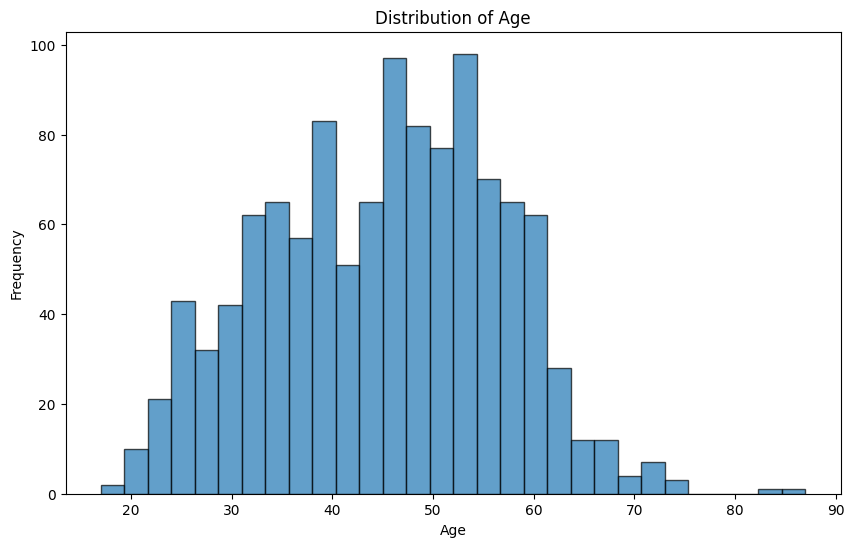

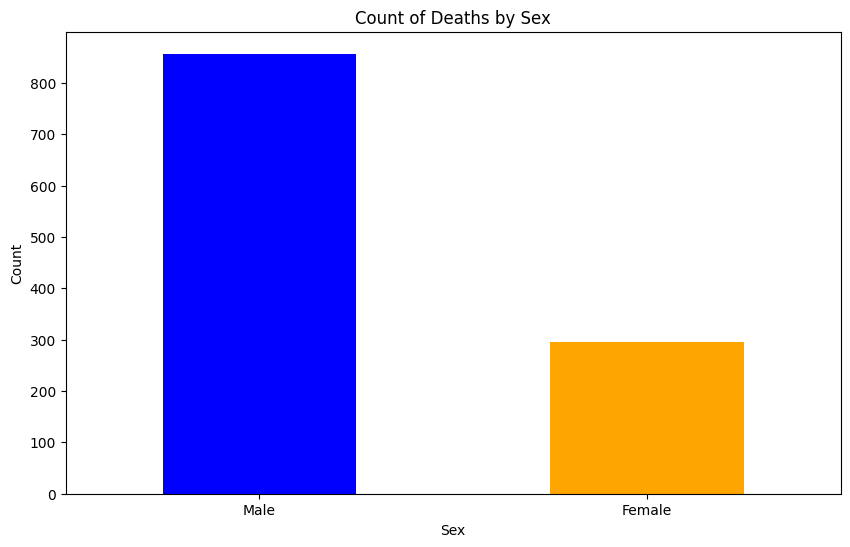

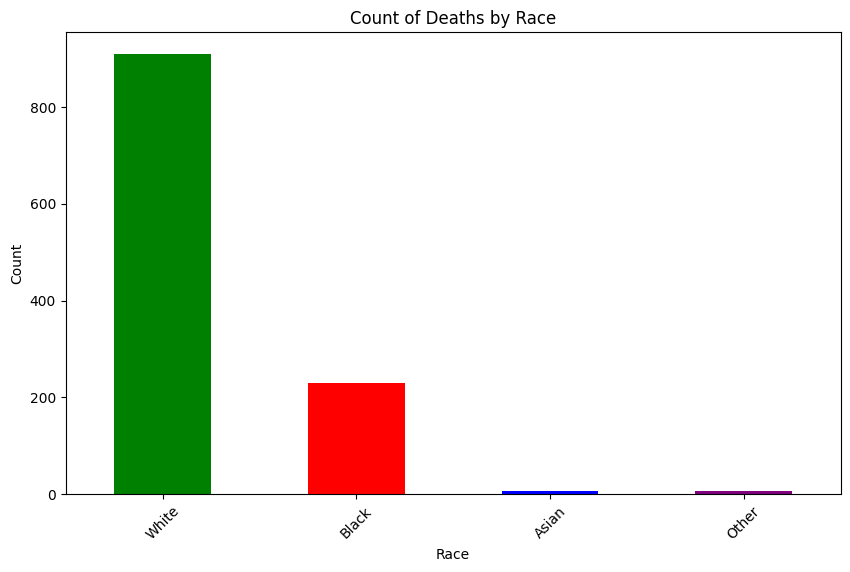

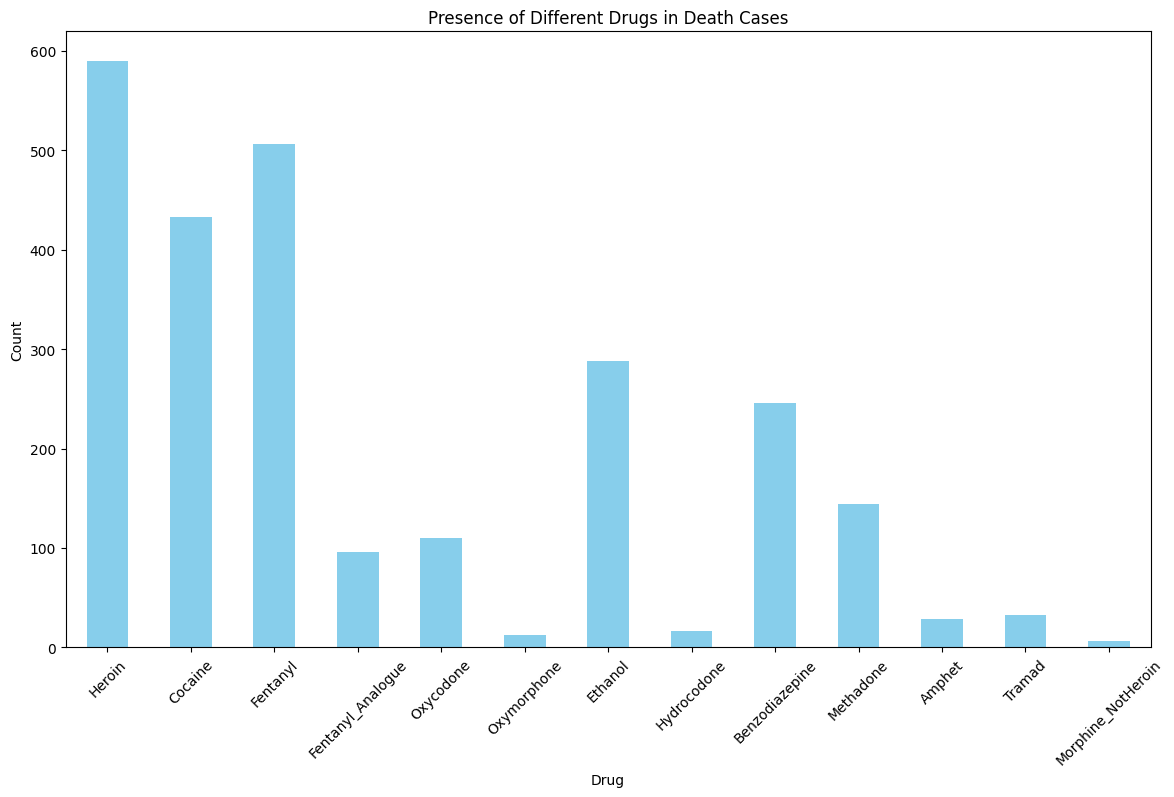

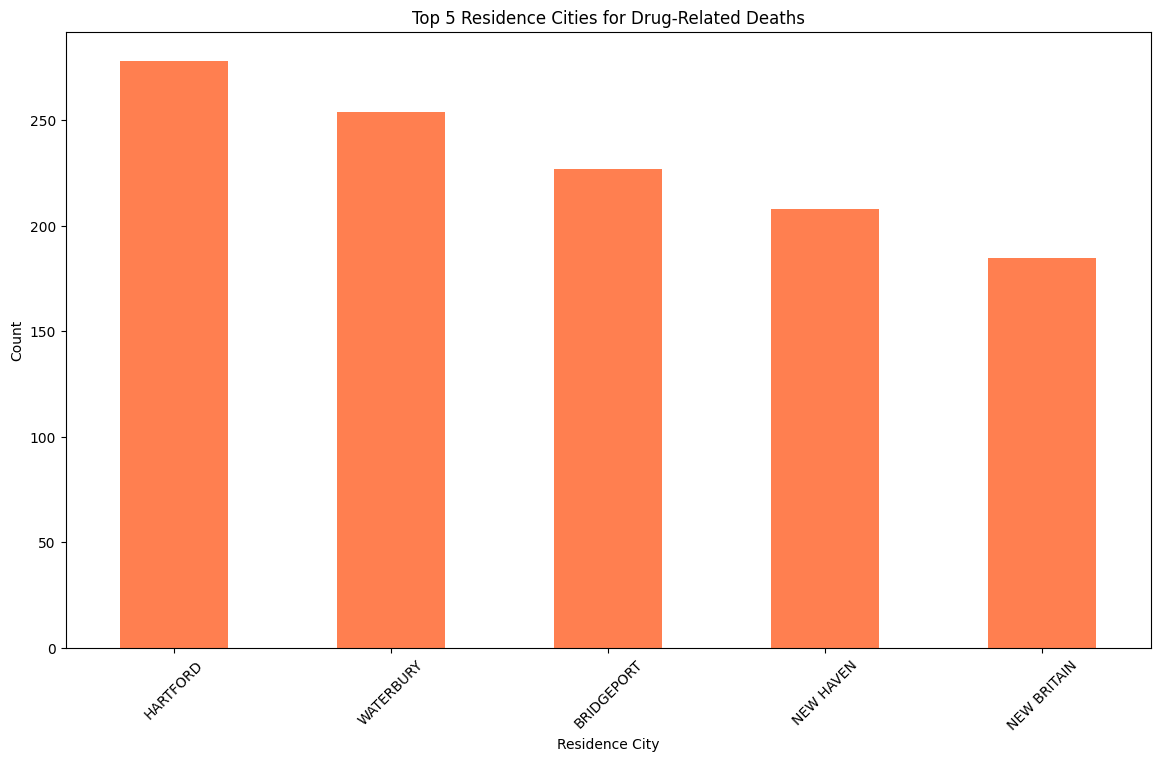

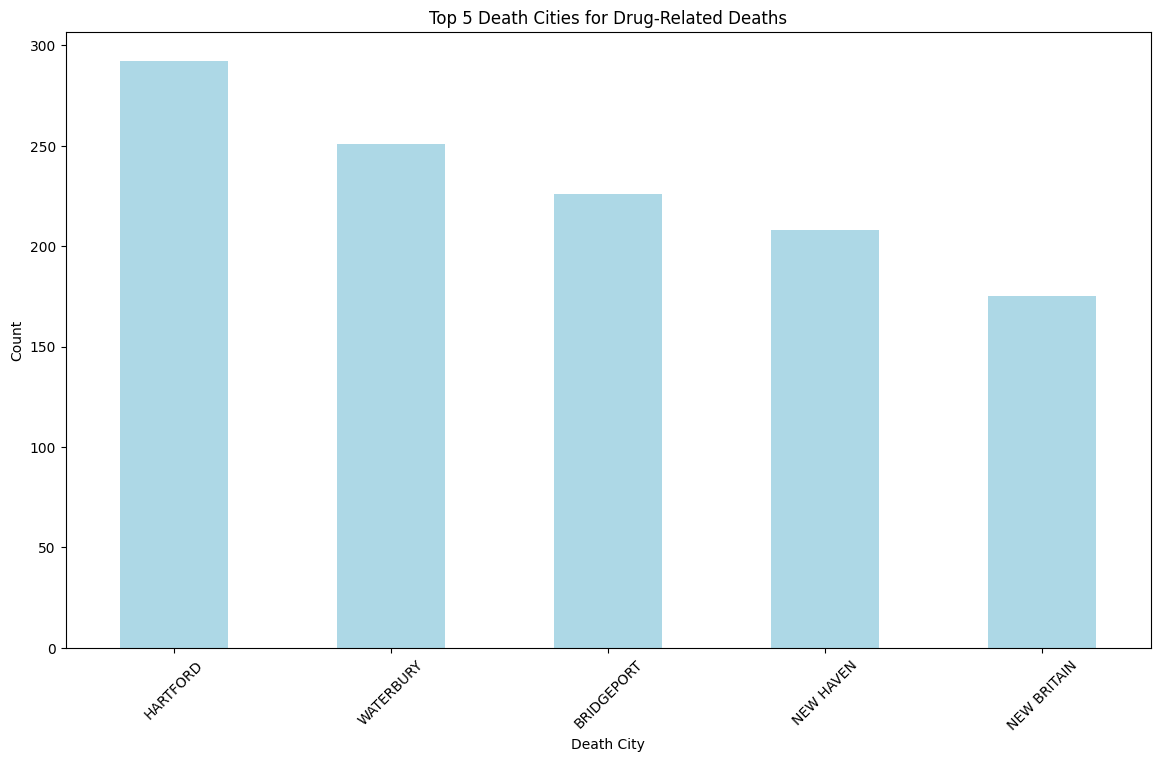

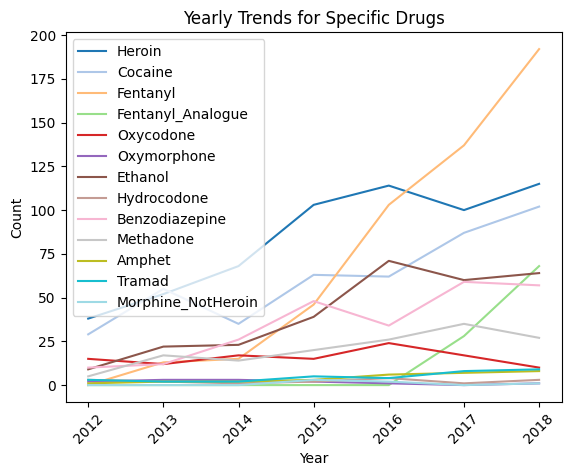

In [ ]:
# *** Data Visualization about data for a single columns (Age,Sex,Race,Cities,Drugs) ***

file_path = 'multi_drug_deaths.csv'
data = pd.read_csv(file_path)

# Distribution plots for age
plt.figure(figsize=(10, 6))
plt.hist(data['Age'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Count plot for Sex
plt.figure(figsize=(10, 6))
data['Sex'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Deaths by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Count plot for Race
plt.figure(figsize=(10, 6))
data['Race'].value_counts().plot(kind='bar', color=['green', 'red', 'blue', 'purple', 'orange'])
plt.title('Count of Deaths by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

drug_presence = data[drug_columns].sum()

plt.figure(figsize=(14, 8))
drug_presence.plot(kind='bar', color='skyblue')
plt.title('Presence of Different Drugs in Death Cases')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count plots for ResidenceCity and DeathCity

# ResidenceCity analysis
residence_city_counts = data['ResidenceCity'].value_counts()

plt.figure(figsize=(14, 8))
residence_city_counts.plot(kind='bar', color='coral')
plt.title('Top 5 Residence Cities for Drug-Related Deaths')
plt.xlabel('Residence City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# DeathCity analysis
death_city_counts = data['DeathCity'].value_counts()

plt.figure(figsize=(14, 8))
death_city_counts.plot(kind='bar', color='lightblue')
plt.title('Top 5 Death Cities for Drug-Related Deaths')
plt.xlabel('Death City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Show the value counts for all cities in a table
residence_city_counts_all = data['ResidenceCity'].value_counts()
death_city_counts_all = data['DeathCity'].value_counts()

residence_city_counts_all = residence_city_counts_all.reset_index().rename(columns={'index': 'ResidenceCity', 'ResidenceCity': 'Count'})
death_city_counts_all = death_city_counts_all.reset_index().rename(columns={'index': 'DeathCity', 'DeathCity': 'Count'})

# Plot trends for specific drugs
yearly_drug_trends = data.groupby('Date')[drug_columns].sum()
yearly_drug_trends.plot(title='Yearly Trends for Specific Drugs', colormap='tab20')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

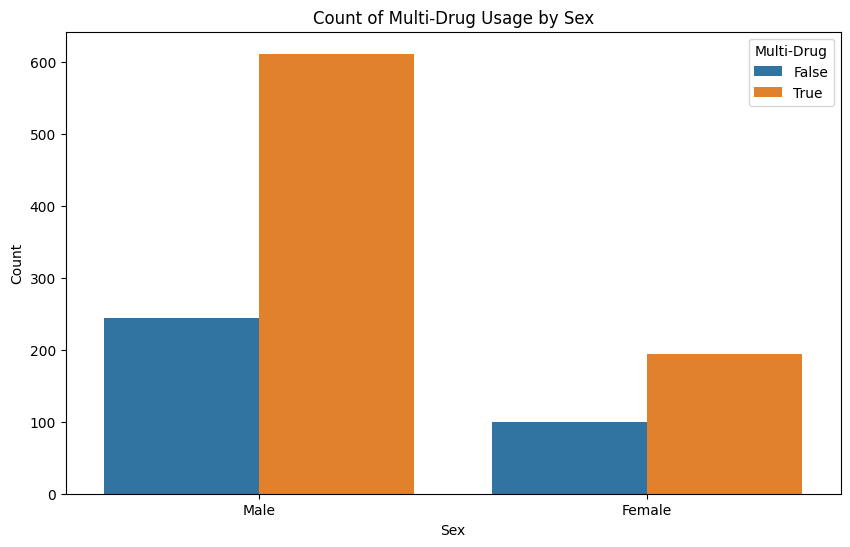

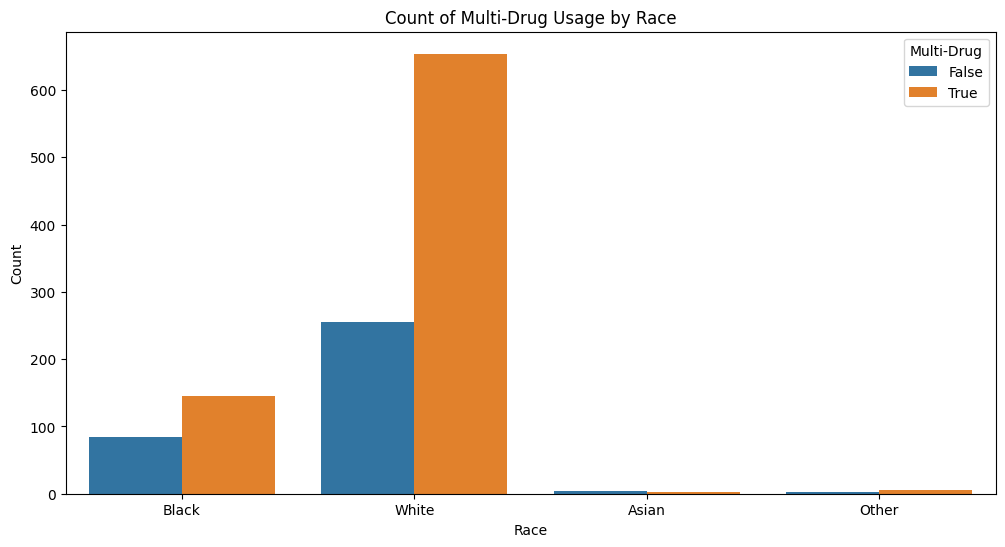

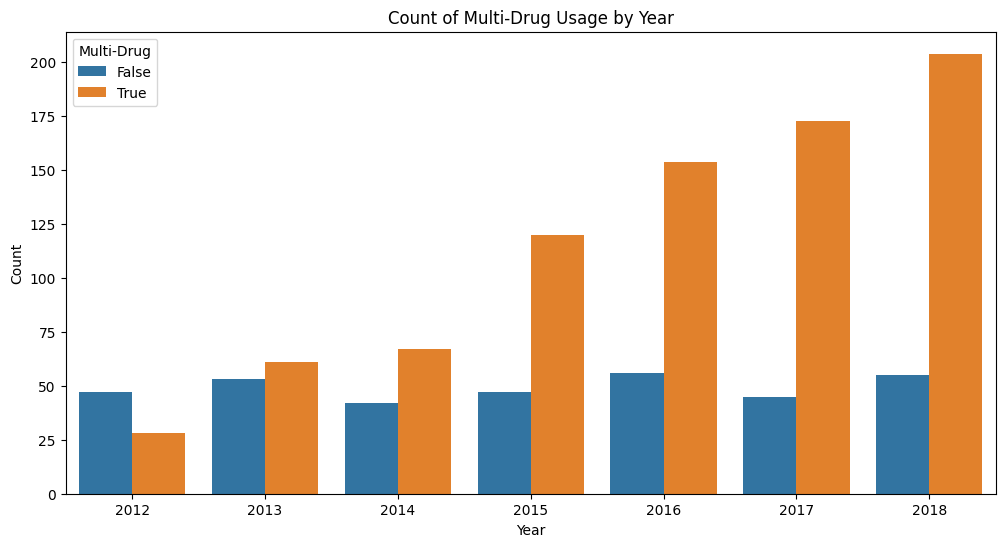

In [ ]:
# *** Data Visualization about data for Multi-Drug ***

# Multiple drug usage by Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex', hue='Multi-Drug')
plt.title('Count of Multi-Drug Usage by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Multiple drug usage by Race
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Race', hue='Multi-Drug')
plt.title('Count of Multi-Drug Usage by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Multiple drug usage by Date(Year)
data['Year'] = data['Date']
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year', hue='Multi-Drug')
plt.title('Count of Multi-Drug Usage by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# *Data Preprocessing 3* - Feature Selection: **'Encoding'**, **'Feature Importance Scoring'** and **'Correlation Matrix'**

In this Section Feature selection is started

**Encoding**: All datasets are categorical data except 'age' so, all categorical data will proceed *OneHotEncoding*

**Feature Importance Scoring** : Because most of the datas are categorical,We can only use the decision tree model. So using feature importance scoring, we are going to find which feature is important. *Target Feature is 'Multi-Drug'*


**Correlation Matrix**: Also to find correlation with features, we proceed correlation matrix too.

In [ ]:
# *** 3-3. Feature Selection : OneHotEncoding ***
from sklearn.preprocessing import OneHotEncoder

# Load Data
df = pd.read_csv('multi_drug_deaths.csv')

# Define columns to encode
columns_to_encode = ['Date', 'Sex', 'Race', 'ResidenceCity', 'DeathCity']

# Define categories
categories = {
    'Date': [2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'Sex': ['Male', 'Female'],
    'Race': ['Asian', 'Black', 'White', 'Other'],
    'ResidenceCity': ['HARTFORD', 'WATERBURY', 'BRIDGEPORT', 'NEW HAVEN', 'NEW BRITAIN'],
    'DeathCity': ['HARTFORD', 'NEW HAVEN', 'WATERBURY', 'BRIDGEPORT', 'NEW BRITAIN']
}

# Set OneHotEncoder and Perform Encoding
encoder = OneHotEncoder(categories=[categories[col] for col in columns_to_encode], sparse_output=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Convert encoded datas to dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
# Merge Encoded datas
df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

# Save to new csv
df_encoded.to_csv("encoded_multi_drug_deaths.csv", index=False)

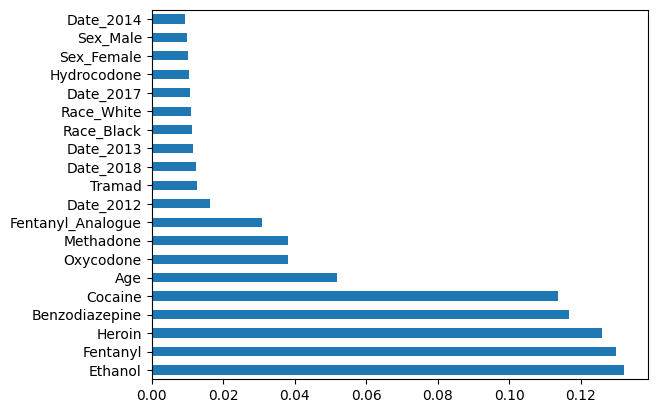

In [ ]:
# *** 3-4. Feature Selection: Feature Importance Scoring ***
from sklearn.ensemble import ExtraTreesClassifier

# Load encoded data
file_path = 'encoded_multi_drug_deaths.csv'
data = pd.read_csv(file_path)

# Set X and target
X = data.loc[:,(data.columns != 'Multi-Drug')]
y = data['Multi-Drug']

model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

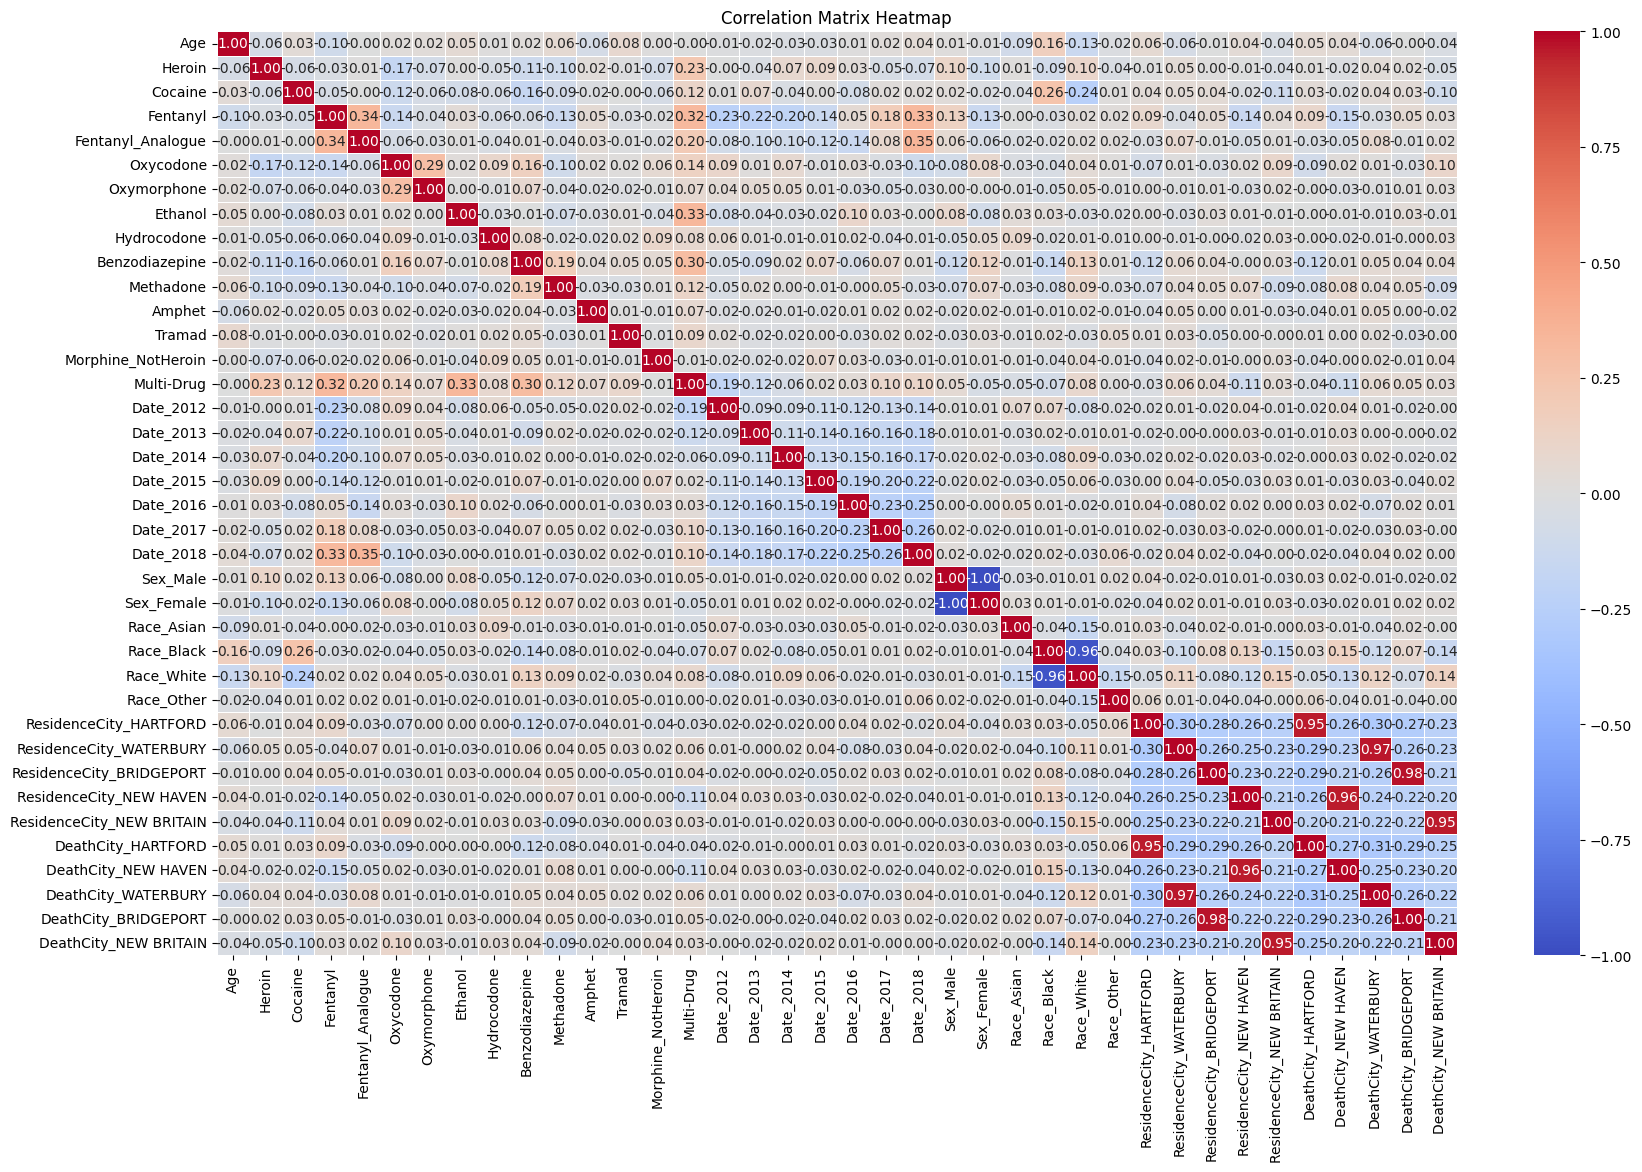

In [ ]:
# *** 3-5. Feature Selection: Correlation Matrix ***

# Load encoded data
file_path = 'encoded_multi_drug_deaths.csv'
data = pd.read_csv(file_path)

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# *Data Analysis* - Decision Tree

Now, using decision tree, create a model for predicting multi-drug usage.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set variables
X = data.loc[:,(data.columns != 'Multi-Drug')]
y = data['Multi-Drug']

# Split data by train and test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=data['Multi-Drug'])

# initialize classifier model
clf = DecisionTreeClassifier(max_depth=4,random_state=42)

# learn model
clf.fit(X_train, y_train)

# perform prediction
y_pred = clf.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8441558441558441
Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.97      0.79        69
        True       0.98      0.79      0.88       162

    accuracy                           0.84       231
   macro avg       0.82      0.88      0.83       231
weighted avg       0.89      0.84      0.85       231



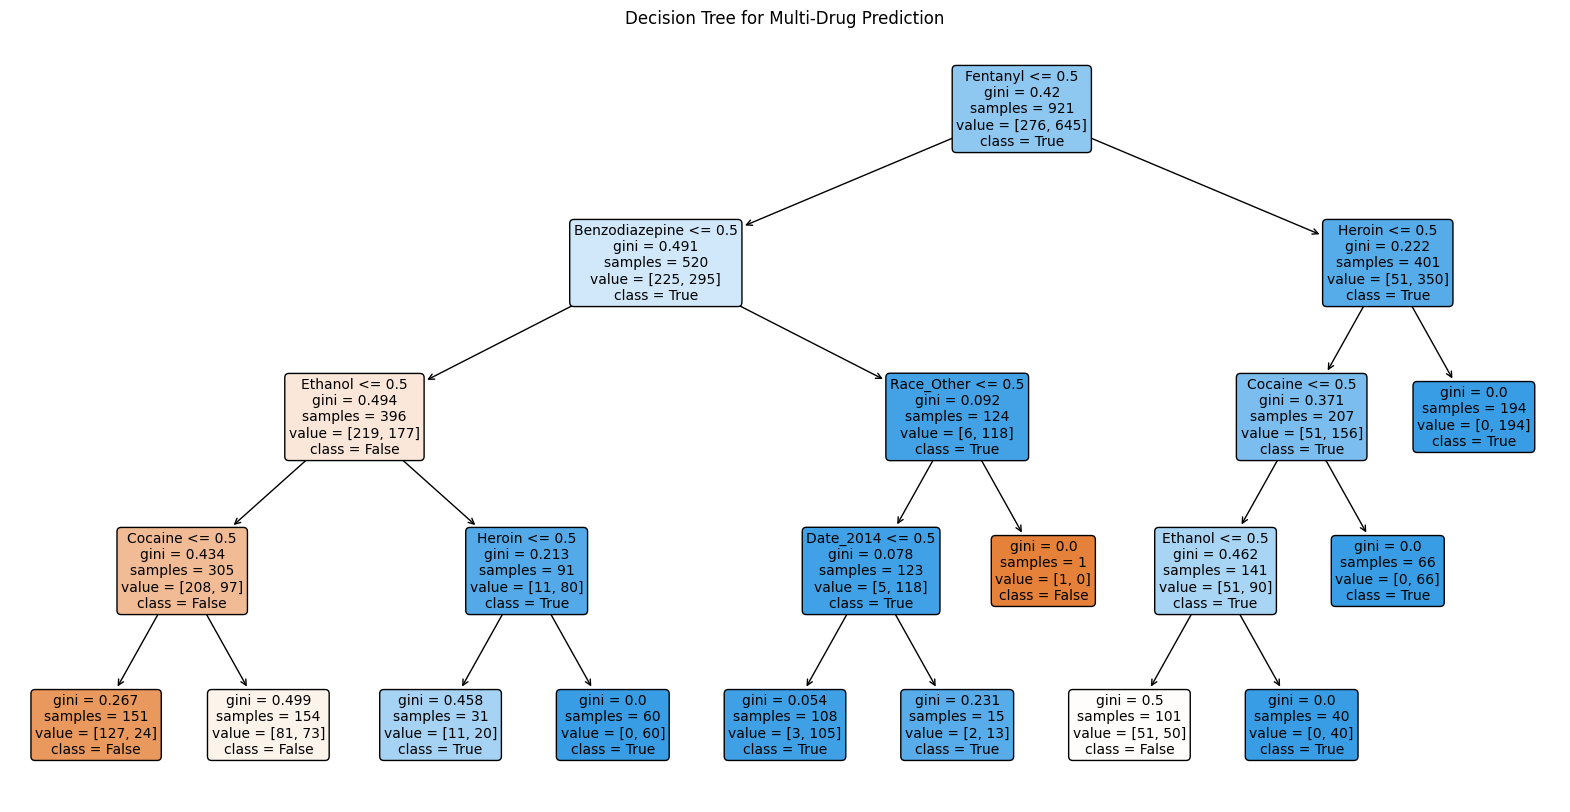

In [ ]:
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['False', 'True'], filled=True, rounded=True)
plt.title('Decision Tree for Multi-Drug Prediction')
plt.show()

# *Data Evaluation 1* - Confusion Matrix

This is our confusion matrix after learning

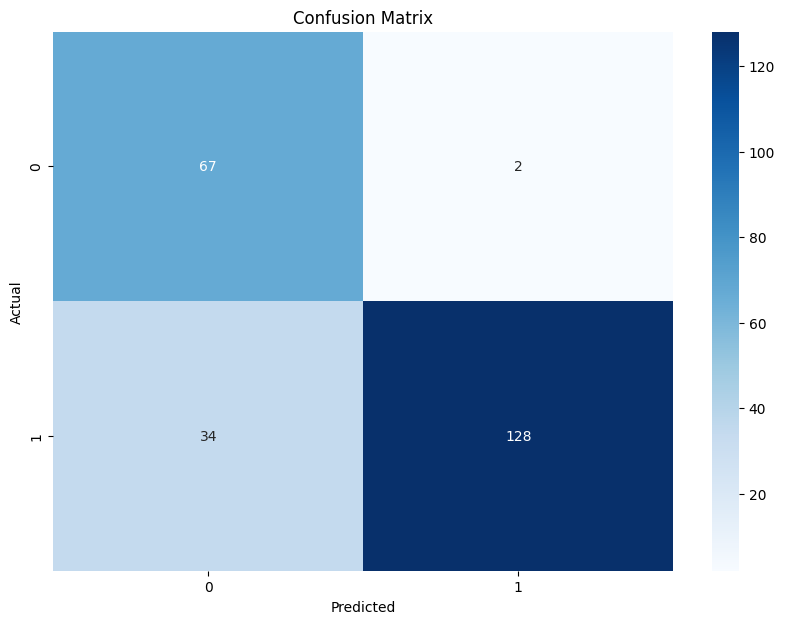

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# *Data Evaluation 2* - Evaluation using K-fold

Evaluate Model by using K-fold method

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Display the cross-validation scores and mean score
cv_scores, cv_scores.mean()

(array([0.80952381, 0.80519481, 0.80434783, 0.80434783, 0.85652174]),
 0.8159872012045926)